In [3]:
from keras.layers import SimpleRNN,Embedding
from keras .models import Sequential


In [4]:
# 1 RNN katmanı

model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
# bouytlandırılmış RNN
model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
# ardışık RNN katmanları
model=Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


# imdb

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [8]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
x_train=sequence.pad_sequences(x_train,500)
x_test=sequence.pad_sequences(x_test,500)

In [10]:
print("eğitim dizisi: ",x_train.shape)
print("test dizisi: ",x_test.shape)

eğitim dizisi:  (25000, 500)
test dizisi:  (25000, 500)


## katman eğitimi

In [11]:
from keras.layers import Dense
import keras

In [37]:
model=Sequential()

## RNN model

In [13]:
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation="sigmoid"))

## LSTM model

In [39]:
model.add(Embedding(1000,32))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(32)))
model.add(Dense(1,activation="sigmoid"))

In [40]:
model.compile(optimizer="rmsprop",loss=keras.losses.binary_crossentropy,metrics=["acc"])

In [41]:
history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 49ms/step - loss: 0.5656 - acc: 0.7221 - val_loss: 0.4610 - val_acc: 0.8042
Epoch 2/10
157/157 [==============================] - 7s 46ms/step - loss: 0.4048 - acc: 0.8251 - val_loss: 0.3879 - val_acc: 0.8420
Epoch 3/10
157/157 [==============================] - 7s 46ms/step - loss: 0.3671 - acc: 0.8447 - val_loss: 0.4575 - val_acc: 0.7860
Epoch 4/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3473 - acc: 0.8558 - val_loss: 0.5735 - val_acc: 0.7258
Epoch 5/10
157/157 [==============================] - 7s 47ms/step - loss: 0.3376 - acc: 0.8616 - val_loss: 0.3966 - val_acc: 0.8260
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3268 - acc: 0.8654 - val_loss: 0.3805 - val_acc: 0.8508
Epoch 7/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3167 - acc: 0.8691 - val_loss: 0.3638 - val_acc: 0.8560
Epoch 8/10
157/157 [==============================] - 7s 46ms/step - 

In [42]:
acc=history.history["acc"]
val_acc=history.history["val_acc"]
loss=history.history["loss"]
val_loss=history.history["val_loss"]

In [43]:
epochs=range(1,len(acc)+1)

In [44]:
import matplotlib.pyplot as plt


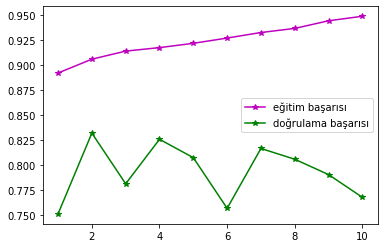

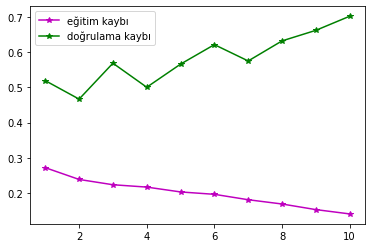

In [36]:
plt.plot(epochs,acc,"m*-",label="eğitim başarısı")
plt.plot(epochs,val_acc,"g*-",label="doğrulama başarısı")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"m*-",label="eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="doğrulama kaybı")
plt.legend()
plt.show()

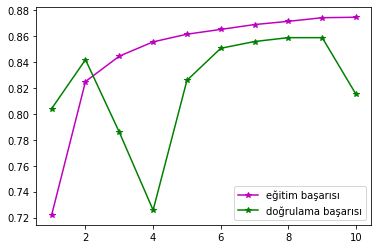

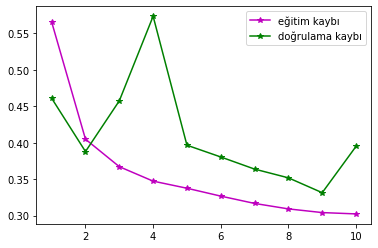

In [45]:
plt.plot(epochs,acc,"m*-",label="eğitim başarısı")
plt.plot(epochs,val_acc,"g*-",label="doğrulama başarısı")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"m*-",label="eğitim kaybı")
plt.plot(epochs,val_loss,"g*-",label="doğrulama kaybı")
plt.legend()
plt.show()